# Feature Importance Using Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Latest Covid-19 India Status.csv")

In [3]:
df.head()

,States,Total Cases Ranking,Sum of Total Cases,Sum of Discharged,Sum of Discharge Ratio (%),Sum of Deaths,Sum of Death Ratio (%),Sum of Active Ratio (%),Sum of Active
0,Maharashtra,1,6524498,6340723,97.18,138546,0.0465,0.0172,45229
1,Kerala,2,4524158,4332897,95.77,23683,0.0114,0.0925,167578
2,Karnataka,3,2968543,2916530,98.25,37627,0.0278,0.0120,14386
3,Tamil Nadu,4,2647041,2594697,98.02,35360,0.0294,0.0160,16984
4,Andhra Pradesh,5,2039529,2011063,98.60,14078,0.0151,0.0177,14388


In [4]:
df.isnull().sum()

States                        0
Total Cases Ranking           0
Sum of Total Cases            0
Sum of Discharged             0
Sum of Discharge Ratio (%)    0
Sum of Deaths                 0
Sum of Death Ratio (%)        0
Sum of Active Ratio (%)       0
Sum of Active                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   States                      36 non-null     object 
 1   Total Cases Ranking         36 non-null     int64  
 2   Sum of Total Cases          36 non-null     int64  
 3   Sum of Discharged           36 non-null     int64  
 4   Sum of Discharge Ratio (%)  36 non-null     float64
 5   Sum of Deaths               36 non-null     int64  
 6   Sum of Death Ratio (%)      36 non-null     float64
 7   Sum of Active Ratio (%)     36 non-null     float64
 8   Sum of Active               36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [6]:
feature_cols = ['Total Cases Ranking','Sum of Discharged','Sum of Discharge Ratio (%)', 'Sum of Deaths','Sum of Death Ratio (%)','Sum of Active Ratio (%)', 'Sum of Active']
X = df[feature_cols]
y = df['Sum of Total Cases']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0.5, 1.0, 'Correlation matrix')

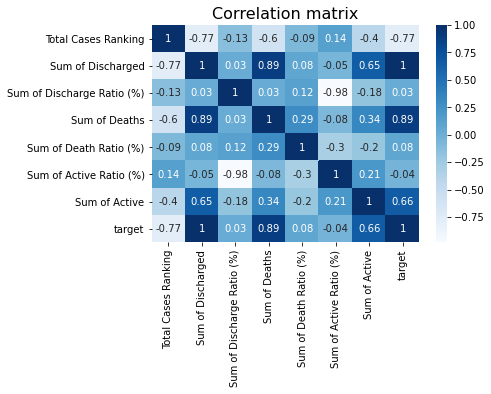

In [8]:
sns.heatmap(X.assign(target = y).corr().round(2), 
            cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 16)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,
                          n_jobs=-1,
                          bootstrap= True,
                          random_state=232)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=232)

In [10]:
print('R^2 Training Score: {:.2f}'.format(rf.score(X_train, y_train)))
print('R^2 Test Score: {:.2f}'.format(rf.score(X_test, y_test)))

R^2 Training Score: 0.97
R^2 Test Score: 0.96


In [11]:
rf.feature_importances_

array([0.30021419, 0.30838542, 0.02296267, 0.1134415 , 0.02245027,
       0.02191517, 0.21063077])

In [12]:
feature_imp = pd.DataFrame({'Feature':feature_cols, 'feature_importance':rf.feature_importances_}).sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [13]:
feature_imp

,Feature,feature_importance
0,Sum of Discharged,0.308385
1,Total Cases Ranking,0.300214
2,Sum of Active,0.210631
3,Sum of Deaths,0.113441
4,Sum of Discharge Ratio (%),0.022963
5,Sum of Death Ratio (%),0.022450
6,Sum of Active Ratio (%),0.021915


In [14]:
feature_imp.Feature

0             Sum of Discharged
1           Total Cases Ranking
2                 Sum of Active
3                 Sum of Deaths
4    Sum of Discharge Ratio (%)
5        Sum of Death Ratio (%)
6       Sum of Active Ratio (%)
Name: Feature, dtype: object

Text(0.5, 1.0, 'Default feature importance (scikit-learn)')

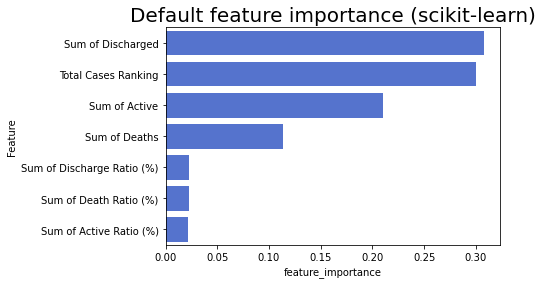

In [15]:
sns.barplot(x = 'feature_importance', y = 'Feature', data = feature_imp, orient = 'h', color = 'royalblue') \
       .set_title('Default feature importance (scikit-learn)', fontsize = 20)